## Importing Libraries and getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
fake = pd.read_csv("dataset/Fake.csv/Fake.csv")
true = pd.read_csv("dataset/True.csv/True.csv")

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
fake["Label"] = 0 
true["Label"] = 1

In [8]:
data = pd.concat([fake ,true] , axis=0 , ignore_index=True)
data.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


0    23481
1    21417
Name: Label, dtype: int64


<AxesSubplot:xlabel='Label', ylabel='count'>

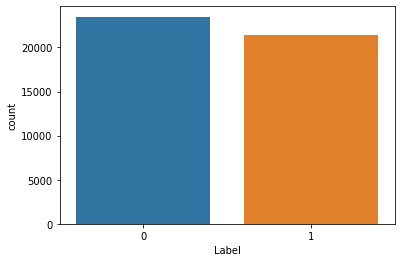

In [9]:
print(data["Label"].value_counts())
sns.countplot(x="Label" , data=data)

## Data Cleaning & Preprocessing

### --> Checking for null values

In [10]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

<AxesSubplot:>

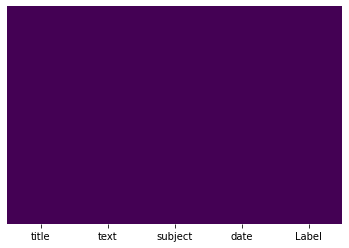

In [11]:
sns.heatmap(data.isnull() , yticklabels=False , cmap="viridis" , cbar=False)

### --> Removing URL

In [12]:
def remove_url(text):
    text = text.split()
    texts = ''

    for w in text:
        if('.com' in w) or ('https' in w) or ('bit.ly' in w):
            continue
        else:
            texts += (w + '')
    return texts
    

In [13]:
data["text"] = data["text"].apply(remove_url)

### --> Checking for Empty-String 

In [14]:
empty = []

for i,title,text, *_ in data.itertuples():
    if text.isspace() or text=='':
        empty.append(i)

print("There are total {} rows with empty string as text ".format(len(empty)))


There are total 715 rows with empty string as text 


In [15]:
# removing the empty strings 
data.drop(empty , inplace=True)

## HTML-TAGS using BeautifulSoup

In [16]:
from bs4 import BeautifulSoup

def remove_html(text):
    soup = BeautifulSoup(text)
    text = soup.get_text()
    return text

In [17]:
data["text"] = data["text"].apply(remove_html)

### --> Removing Punctuation

In [18]:
import string 

punctuations = string.punctuation 
punctuations +='\n \n\n'

def remove_punctuations(text):
    text = text.split(' ')
    text = [word.lower() for word in text if word not in punctuations]
    return ' '.join(text)

In [19]:
data['text'] = data['text'].apply(remove_punctuations)

## Splitting the Data

In [20]:
X = data["text"]
y = data['Label']

X.shape ,y.shape

((44183,), (44183,))

In [21]:
y_encoded = pd.get_dummies(y , drop_first=True)

In [22]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29602,), (14581,), (29602, 1), (14581, 1))

# Creating models & evaluation

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC 
from sklearn.metrics import  accuracy_score , confusion_matrix


## Naive Bayes

In [24]:
pipeline_nb = Pipeline([
    ('vector' , TfidfVectorizer(stop_words='english')),
    ('classifier' , MultinomialNB())
])

In [25]:
pipeline_nb.fit(X_train, y_train.values.ravel())


Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [26]:
y_predict_nb = pipeline_nb.predict(X_test)

accuracy_nb = accuracy_score(y_test , y_predict_nb)
print("Naive-Bayes Model has an accuracy of {} %".format(accuracy_nb*100))

Naive-Bayes Model has an accuracy of 98.97812221383992 %


<AxesSubplot:>

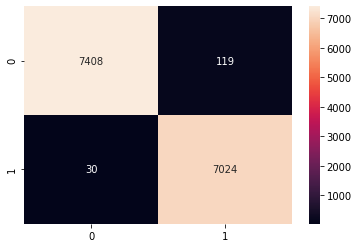

In [27]:
sns.heatmap(confusion_matrix(y_test, y_predict_nb), annot=True, fmt='.4g')

## Logistic Regression 

In [28]:
pipeline_LoR = Pipeline([
    ('vector' , TfidfVectorizer(stop_words='english')),
    ('classifier' , LogisticRegression())
])

In [29]:
pipeline_LoR.fit(X_train, y_train.values.ravel())


Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', LogisticRegression())])

In [30]:
y_predict_LoR = pipeline_LoR.predict(X_test)

accuracy_LoR = accuracy_score(y_test , y_predict_LoR)
print("Logistic-Regression Model has an accuracy of {} % ".format(accuracy_LoR*100))


Logistic-Regression Model has an accuracy of 98.95754749331321 % 


<AxesSubplot:>

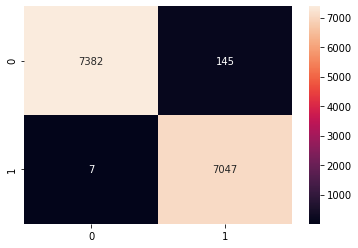

In [31]:
sns.heatmap(confusion_matrix(y_test, y_predict_LoR), annot=True, fmt='.4g')

## Linear SVC 

In [32]:
pipeline_svc = Pipeline([
    ('vector' , TfidfVectorizer(stop_words='english')),
    ('classifier' , LinearSVC())
])

In [33]:
pipeline_svc.fit(X_train , y_train.values.ravel())

Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', LinearSVC())])

In [34]:
y_predict_svc = pipeline_svc.predict(X_test)

accuracy_svc =accuracy_score(y_test , y_predict_svc)
print("LinearSVC model has an accuracy of {} %".format(accuracy_svc*100))

LinearSVC model has an accuracy of 99.36904190384747 %


<AxesSubplot:>

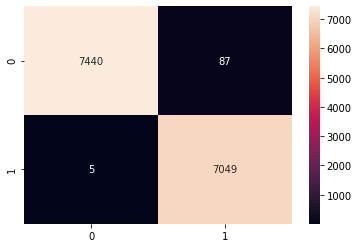

In [35]:
sns.heatmap(confusion_matrix(y_test, y_predict_svc), annot=True,fmt='.4g')

In [37]:
# creating Dataframe to check which model was the best

models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'Linear SVC'],
    'Accuracy Score': [
        accuracy_nb ,
        accuracy_LoR ,
        accuracy_svc
    ]})

models.sort_values(by='Accuracy Score', ascending=False)


,Model,Accuracy Score
2,Linear SVC,0.993690
0,Naive Bayes,0.989781
1,Logistic Regression,0.989575
